<a href="https://colab.research.google.com/github/KhosrojerdiA/NLP/blob/main/Text_Classification_BOW_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection (1).tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


#Without using Message Feature

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

Missing values

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Dataset is extremlt skewed

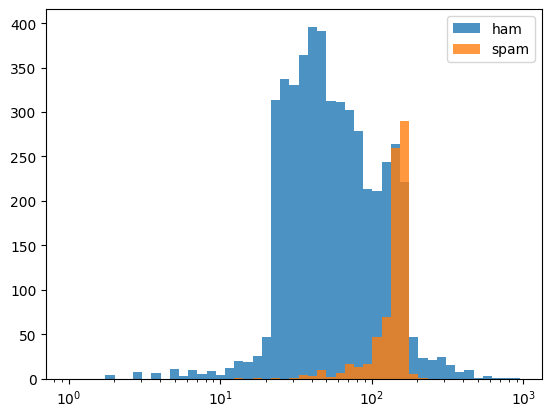

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

Small range of values where a message is more likely to ve spam than ham

In [ ]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

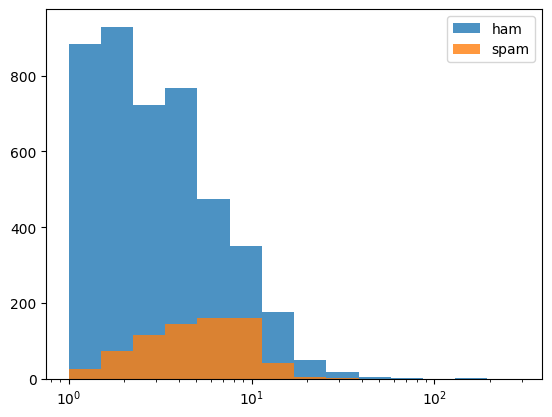

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

##Logistic Regression

In [ ]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)


from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


LogisticRegression()

In [ ]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df
#actuals are column

,ham,spam
ham,1547,46
spam,241,5


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


##Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8607939097335509


##SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.8863512778684067


#2. NLP for Document

In [ ]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals

Writing 1.txt


In [ ]:
%%writefile 2.txt
This story is about surfing
Catching waves is fun
Surfing is a popular water sport

Writing 2.txt


##Build Vocabulary

build numerical array from all the words that appear in every document. instance vector for each individual document.

In [ ]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [ ]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


##Feature Extraction

In [ ]:
# Create an empty vector with space for each word in the vocabulary:
one = ['1.txt']+[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    one[vocab[word]]+=1

one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

<font color=green>We can see that most of the words in 1.txt appear only once, although "cats" appears twice.</font>

In [ ]:
# Do the same for the second document:
two = ['2.txt']+[0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    two[vocab[word]]+=1

In [ ]:
# Compare the two vectors:
print(f'{one}\n{two}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


## Bag of Words and Tf-idf
In the above examples, each vector can be considered a *bag of words*. By itself these may not be helpful until we consider *term frequencies*, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider *inverse document frequency*, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency).

Together these terms become [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Stop Words and Word Stems
Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say `cat` in place of both `cat` and `cats`. This will shrink our vocab array and improve performance.

#3. Tokenization and Tagging
When we created our vectors the first thing we did was split the incoming text on whitespace with `.split()`. This was a crude form of *tokenization* - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated *morphology* to parse text appropriately.

Once the text is divided, we can go back and *tag* our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become ***high dimensional sparse matrices***.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection (1).tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

##CounterVectorizer of X which is Message

Text Processing, Tokenizing and filter out the stopwords.
Builds vocabulary of feature and transforms documents to feature vectors

In [ ]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

3733 documents with 7082 features

## Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called **tf** for Term Frequencies.

Another refinement on top of **tf** is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called **tf–idf** for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

## Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using [TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

#4. Train Classifier with LinearSVC using TFIDF
it handles sparse input better

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

##Build Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()), #X is message only
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


#5. Text Classification for Moviereviews.tsv Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [ ]:
len(df)
# Check for the existence of NaN values in a cell:
df.isnull().sum()

label      0
review    35
dtype: int64

In [ ]:
df.dropna(inplace=True)

len(df)

1965

##Remove whitespace

In [ ]:
blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

print(len(blanks), 'blanks: ', blanks)

27 blanks:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [ ]:
df.drop(blanks, inplace=True)

len(df)

1938

In [ ]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

###Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

####NB

In [ ]:
#First Model
text_clf_nb.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf_nb.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[287  21]
 [130 202]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

    accuracy                           0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



####LinearSVC

In [ ]:
#Second Model

text_clf_lsvc.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[259  49]
 [ 49 283]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



##Removing custom StopWords

###Pipeline
LinearSVC

In [ ]:
#Adding Stopwords

stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']


# RUN THIS CELL TO ADD STOPWORDS TO THE LINEAR SVC PIPELINE:
text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LinearSVC()),
])
text_clf_lsvc2.fit(X_train, y_train)

#Predict New Data

In [ ]:
myreview = "A movie I really wanted to love was terrible. \
I'm sure the producers had the best intentions, but the execution was lacking."

print(text_clf_nb.predict([myreview]))  # be sure to put "myreview" inside square brackets
print(text_clf_lsvc.predict([myreview]))

['neg']
['neg']
